Dated 05/03/25

*   Aditi
*   M.Tech. CSA
*   242211001
*   Timestamp: 11.00 AM

In [1]:
def unitStep(v):
    if v >= 0:
        return 1
    else:
        return 0

def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    y = unitStep(v)
    return y

In [2]:
import numpy as np
import pandas as pd

OR GATE

In [3]:
# w1 = 1, w2 = 1, b = -0.5
def OR_logicFunction(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptronModel(x, w, b)


test1 = np.array([0, 1])
test2 = np.array([1, 1])
test3 = np.array([0, 0])
test4 = np.array([1, 0])

print("OR({}, {}) = {}".format(0, 1, OR_logicFunction(test1)))
print("OR({}, {}) = {}".format(1, 1, OR_logicFunction(test2)))
print("OR({}, {}) = {}".format(0, 0, OR_logicFunction(test3)))
print("OR({}, {}) = {}".format(1, 0, OR_logicFunction(test4)))

OR(0, 1) = 1
OR(1, 1) = 1
OR(0, 0) = 0
OR(1, 0) = 1


AND GATE

In [4]:
def AND_logicFunction(x):
    w = np.array([1, 1])# w1 = 1, w2 = 1, b = -1.5
    b = -1.5
    return perceptronModel(x, w, b)
test1 = np.array([0, 1])
test2 = np.array([1, 1])
test3 = np.array([0, 0])
test4 = np.array([1, 0])

print("AND({}, {}) = {}".format(0, 1, AND_logicFunction(test1)))
print("AND({}, {}) = {}".format(1, 1, AND_logicFunction(test2)))
print("AND({}, {}) = {}".format(0, 0, AND_logicFunction(test3)))
print("AND({}, {}) = {}".format(1, 0, AND_logicFunction(test4)))

AND(0, 1) = 0
AND(1, 1) = 1
AND(0, 0) = 0
AND(1, 0) = 0


The amount of iterations the model takes to learn about the gates is 1 i.e. the first run itself because we are just giving the model a formula that it can apply onto the input and get a mathematical result.

XOR GATE

In [5]:
def NOT_logicFunction(x):
    w = -1
    b = 0.5
    return perceptronModel(x, w, b)

def XOR_logicFunction(x):
    y1 = AND_logicFunction(x)
    y2 = OR_logicFunction(x)
    y3 = NOT_logicFunction(y1)
    final_x = np.array([y2, y3])
    finalOutput = AND_logicFunction(final_x)
    return finalOutput

# testing the Perceptron Model
test1 = np.array([0, 1])
test2 = np.array([1, 1])
test3 = np.array([0, 0])
test4 = np.array([1, 0])

print("XOR({}, {}) = {}".format(0, 1, XOR_logicFunction(test1)))
print("XOR({}, {}) = {}".format(1, 1, XOR_logicFunction(test2)))
print("XOR({}, {}) = {}".format(0, 0, XOR_logicFunction(test3)))
print("XOR({}, {}) = {}".format(1, 0, XOR_logicFunction(test4)))

XOR(0, 1) = 1
XOR(1, 1) = 0
XOR(0, 0) = 0
XOR(1, 0) = 1


Because the data is linearly inseperable, we cannot use the AND or OR logic here and any sort of operation will lead to possibly false results.

Thus we are using XOR gate here which is capable of indicating when the inputs are in the same group or not. It returns 0 for same group data points and 1 for points from different groups.

**Using perceptron to build a linear regression classifier.**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [7]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.8], [8.9], [5.2], [4.59], [2.1], [8], [5], [7.5], [5], [4],
                     [8], [5.2], [4.9], [3], [4.7], [4], [4.8], [3.5], [2.1], [4.1]], dtype = np.float32)
y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], [3.3], [2.6], [1.96], [3.13], [1.76],
                     [3.2], [2.1], [1.6], [2.5], [2.2], [2.75], [2.4], [1.8], [1], [2],
                     [1.6], [2.4], [2.6], [1.5], [3.1]], dtype = np.float32)

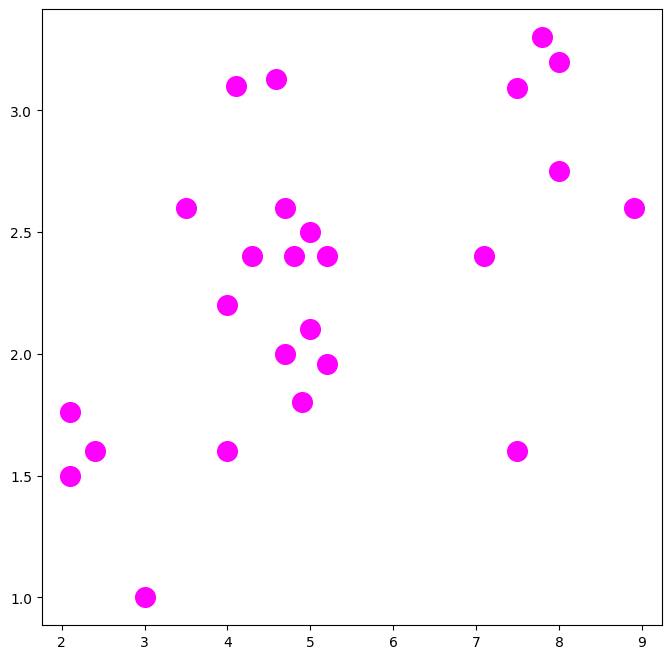

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='fuchsia', s=200, label='Original data')
plt.show()

In [9]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

In [10]:
print('requires gradient for X_train: ', X_train.requires_grad)
print('requires gradient for Y_train: ', Y_train.requires_grad)

requires gradient for X_train:  False
requires gradient for Y_train:  False


In [11]:
input_size = 1
hidden_size = 1
output_size = 1
learning_rate = 0.001

w1 = torch.rand(input_size, hidden_size, requires_grad=True)
b1 = torch.rand(hidden_size, output_size, requires_grad=True)

In [12]:
for iter in range(1, 4001):
    y_pred = X_train.mm(w1).clamp(min=0).add(b1)
    loss = (y_pred - Y_train).pow(2).sum()
    if iter % 100 ==0:
        print(iter, loss.item())
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

100 7.316579341888428
200 6.486563682556152
300 6.232244491577148
400 6.154320240020752
500 6.130444526672363
600 6.123129367828369
700 6.120887279510498
800 6.120200157165527
900 6.119990825653076
1000 6.119926452636719
1100 6.1199049949646
1200 6.119899749755859
1300 6.119898319244385
1400 6.119897842407227
1500 6.119896411895752
1600 6.119897365570068
1700 6.119895935058594
1800 6.119895935058594
1900 6.11989688873291
2000 6.11989688873291
2100 6.11989688873291
2200 6.11989688873291
2300 6.11989688873291
2400 6.11989688873291
2500 6.11989688873291
2600 6.11989688873291
2700 6.11989688873291
2800 6.11989688873291
2900 6.11989688873291
3000 6.11989688873291
3100 6.11989688873291
3200 6.11989688873291
3300 6.11989688873291
3400 6.11989688873291
3500 6.11989688873291
3600 6.11989688873291
3700 6.11989688873291
3800 6.11989688873291
3900 6.11989688873291
4000 6.11989688873291


In [13]:
print ('w1: ', w1)
print ('b1: ', b1)

w1:  tensor([[0.1751]], requires_grad=True)
b1:  tensor([[1.4045]], requires_grad=True)


In [14]:
predicted = X_train.mm(w1).clamp(min=0).add(b1)

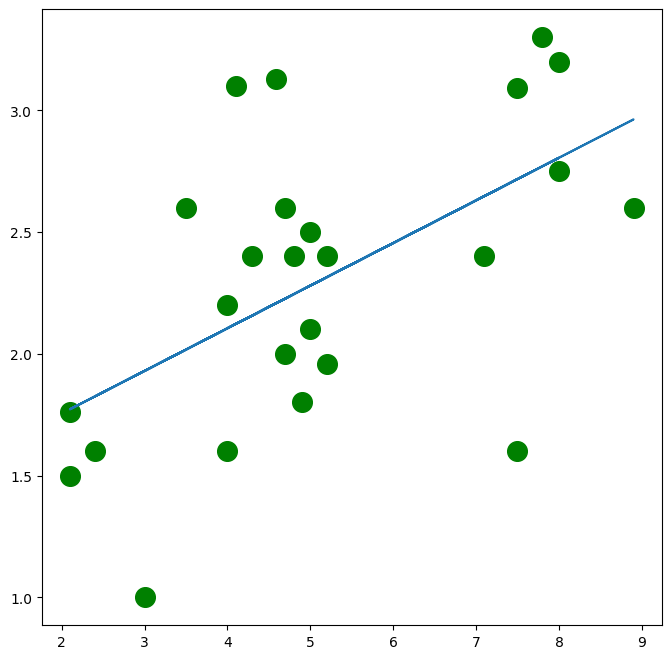

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(X_train, y_train, c='green', s=200, label='Original data')
plt.plot(X_train.detach().numpy(), predicted.detach().numpy(), label = 'Fitted line')
plt.show()

**Second set of linear regression with perceptron**

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x = np.array([3, 1, 7, 8, 4])
y = np.array([1, 1, -1, -1, 1])
w = 0
b = 0
learning_rate = 0.01

In [18]:
for _ in range(50):
    y_hat = np.sign(w * x + b)
    correct = y == y_hat
    for i in range(len(y)):
        if y[i] != y_hat[i]:
            w += learning_rate * (y[i] - y_hat[i]) * x[i]
            b += learning_rate * (y[i] - y_hat[i])
    print(f"Iteration {_ + 1}: Correctly classified: {np.sum(correct)} / {len(y)}")

Iteration 1: Correctly classified: 0 / 5
Iteration 2: Correctly classified: 2 / 5
Iteration 3: Correctly classified: 3 / 5
Iteration 4: Correctly classified: 2 / 5
Iteration 5: Correctly classified: 3 / 5
Iteration 6: Correctly classified: 3 / 5
Iteration 7: Correctly classified: 2 / 5
Iteration 8: Correctly classified: 3 / 5
Iteration 9: Correctly classified: 3 / 5
Iteration 10: Correctly classified: 2 / 5
Iteration 11: Correctly classified: 5 / 5
Iteration 12: Correctly classified: 5 / 5
Iteration 13: Correctly classified: 5 / 5
Iteration 14: Correctly classified: 5 / 5
Iteration 15: Correctly classified: 5 / 5
Iteration 16: Correctly classified: 5 / 5
Iteration 17: Correctly classified: 5 / 5
Iteration 18: Correctly classified: 5 / 5
Iteration 19: Correctly classified: 5 / 5
Iteration 20: Correctly classified: 5 / 5
Iteration 21: Correctly classified: 5 / 5
Iteration 22: Correctly classified: 5 / 5
Iteration 23: Correctly classified: 5 / 5
Iteration 24: Correctly classified: 5 / 5
I

In [19]:
print(f'Final weight (w): {w}')
print(f'Final bias (b): {b}')

Final weight (w): -0.050000000000000086
Final bias (b): 0.20999999999999996


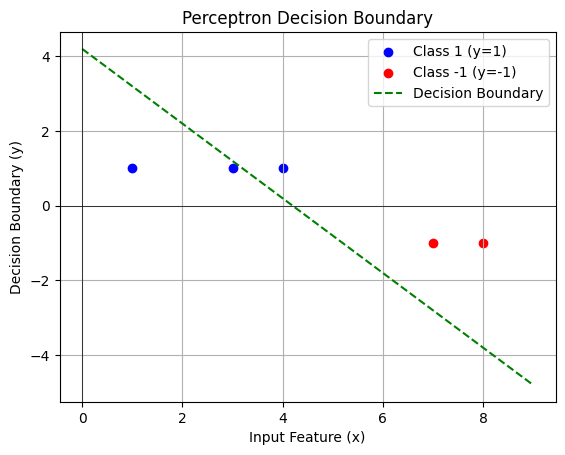

In [20]:
plt.scatter(x[y == 1], y[y == 1], color='blue', label='Class 1 (y=1)')
plt.scatter(x[y == -1], y[y == -1], color='red', label='Class -1 (y=-1)')
x_values = np.linspace(min(x) - 1, max(x) + 1, 100)
decision_boundary = -(b + w * x_values) / w
plt.plot(x_values, decision_boundary, color='green', linestyle='--', label='Decision Boundary')
plt.axhline(0, color='black', linewidth=0.5)  # Line at y = 0
plt.axvline(0, color='black', linewidth=0.5)  # Line at x = 0
plt.xlabel('Input Feature (x)')
plt.ylabel('Decision Boundary (y)')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()